In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import spacy

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialisation NLP

In [2]:
nlp = spacy.load("en_core_web_sm")

# Data Visualisation et Importation

In [27]:
df = pd.read_csv("Data/fake_real_news.csv")

In [28]:
df.head()

,title,text,subject,date,target
0,GERMAN RESIDENTS FIGHT BACK: Anti-Islamic Song...,Apparently these Germans are not interested in...,left-news,"Jan 3, 2016",1
1,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...,I VE HAD IT!,politics,"Jul 20, 2015",1
2,Greek president tells Turkey's Erdogan no trea...,ATHENS (Reuters) - Greek President Prokopis Pa...,worldnews,"December 7, 2017",0
3,Colbert Scorches Trump’s Anti-Trans Bigotry; ...,"During his campaign, Donald Trump promised tha...",News,"February 24, 2017",1
4,"Pentagon chief, Saudi deputy crown prince disc...",WASHINGTON (Reuters) - U.S. Defense Secretary ...,politicsNews,"March 16, 2017",0


In [139]:
label = {
    1 : "Fake News",
    0 : "Real News"
}

In [31]:
df.drop(["date","title","subject"],axis=1,inplace=True)

In [33]:
df.head()

,text,target
0,Apparently these Germans are not interested in...,1
1,I VE HAD IT!,1
2,ATHENS (Reuters) - Greek President Prokopis Pa...,0
3,"During his campaign, Donald Trump promised tha...",1
4,WASHINGTON (Reuters) - U.S. Defense Secretary ...,0


In [35]:
df.shape

(44898, 2)

In [38]:
df["target"].value_counts()

target
1    23481
0    21417
Name: count, dtype: int64

# Preprocessing

In [79]:
def preprocessing(text):
    doc = nlp(text)
    filtrage = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtrage.append(token.lemma_)
    return " ".join(filtrage)

In [ ]:
text = "i am ready for war."
doc = nlp(text)
for tok in doc:
    print(tok.lemma_)

In [69]:
len(df.text[0])

1168

In [83]:
len(preprocessing(df.text[0]))

722

In [87]:
df["Preprocessing_text"] = df.text.apply(preprocessing)

In [89]:
df.head()

,text,target,Preprocessing_text
0,Apparently these Germans are not interested in...,1,apparently Germans interested Sweden wordless ...
1,I VE HAD IT!,1,ve
2,ATHENS (Reuters) - Greek President Prokopis Pa...,0,ATHENS Reuters greek President Prokopis Pavlop...
3,"During his campaign, Donald Trump promised tha...",1,campaign Donald Trump promise friend LGBTQ com...
4,WASHINGTON (Reuters) - U.S. Defense Secretary ...,0,WASHINGTON Reuters U.S. Defense Secretary Jame...


# Data split

In [101]:
X = df.Preprocessing_text
y = df.target
X_train,X_test, y_train, y_test = train_test_split(X,y, 
                                                   train_size=0.8,
                                                   random_state=0,
                                                  stratify= df.target)

In [103]:
X_train.shape

(35918,)

In [105]:
X_test.shape

(8980,)

In [109]:
y_train.value_counts()

target
1    18785
0    17133
Name: count, dtype: int64

# Entrainement du modèle

In [111]:
clf = Pipeline([
    ("Vec", CountVectorizer()),
    ("Model", MultinomialNB())
])

clf.fit(X_train, y_train)


Pipeline(steps=[('Vec', CountVectorizer()), ('Model', MultinomialNB())])

In [113]:
prediction = clf.predict(X_test)

In [119]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4284
           1       0.96      0.96      0.96      4696

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [121]:
y_test.unique()

array([1, 0], dtype=int64)

In [123]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1] )


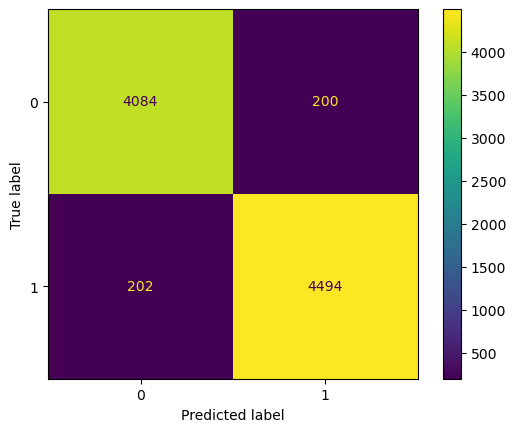

In [125]:
disp.plot()

In [183]:
import joblib

In [185]:
joblib.dump(clf, "fake_news_detection.pkl")

['fake_news_detection.pkl']